# Identifying trends in the Students Performance dataset 

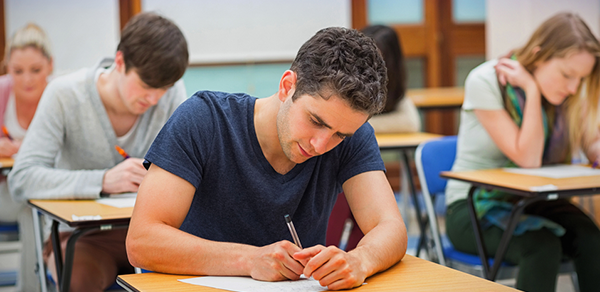

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

##### Opening the file

In [2]:
with open('StudentsPerformance.csv', 'r') as f:
    df = pd.read_csv(f)
    
df['Student'] = range(1, len(df) + 1)
df = df.set_index('Student')
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

##### Observing the basic shape of the database

In [3]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [4]:
df.shape

(1000, 8)

##### Turning the 'test preparation course' column to a list of values

In [5]:
prep = list(df['test preparation course'].unique())
prep

['none', 'completed']

In [6]:
df['test preparation course'] = df['test preparation course'].replace({'none': 0, 'completed': 1}) # 0 = none, 1 = completed
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

         test preparation course  math score  reading score  writing score  
Student                                                                     
1                              0          72             72             74  
2                              1          69             90             88  
3                              0          90             95             93  
4                              0          47             57             44  
5                              0          76             78             75

In [7]:
prep = df.groupby('test preparation course').get_group(1) # students with prep course
no_prep = df.groupby('test preparation course').get_group(0) # students with no prep course
prep.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
2        female        group C                some college      standard   
7        female        group B                some college      standard   
9          male        group D                 high school  free/reduced   
14         male        group A                some college      standard   
19         male        group C             master's degree  free/reduced   

         test preparation course  math score  reading score  writing score  
Student                                                                     
2                              1          69             90             88  
7                              1          88             95             92  
9                              1          64             64             67  
14                             1          78             72             70  
19                             1          46             42             46

### Making average scores for both prep groups

In [8]:
ps = list(prep[['math score', 'reading score', 'writing score']].values) # taking scores for students with prep
nps = list(no_prep[['math score', 'reading score', 'writing score']].values) # for students with no prep

prep_average = [] # to store average scores for students with prep and no prep
no_prep_average = []

for x in range(len(ps)):
    prep_average.append(round(np.mean(ps[x]))) # calculating means and rounding them
    no_prep_average.append(round(np.mean(nps[x])))

# sorting both average scores in descending
prep_average.sort(reverse=True)
no_prep_average.sort(reverse=True)

# making a database to make plotting the graph more readable
average = pd.DataFrame(list(zip(prep_average, no_prep_average, range(1, len(prep_average)))), columns=['Prep', 'No Prep', 'Student'])
average = average.set_index('Student')
average.head()

Prep  No Prep
Student               
1         100      100
2         100       96
3          99       96
4          99       94
5          99       93

### Making a graph to find the relationship between grades and test preparation

For both students, who have preppared and not prepped, the scores were arranged in descending order and grouped together

<IPython.core.display.Javascript object>


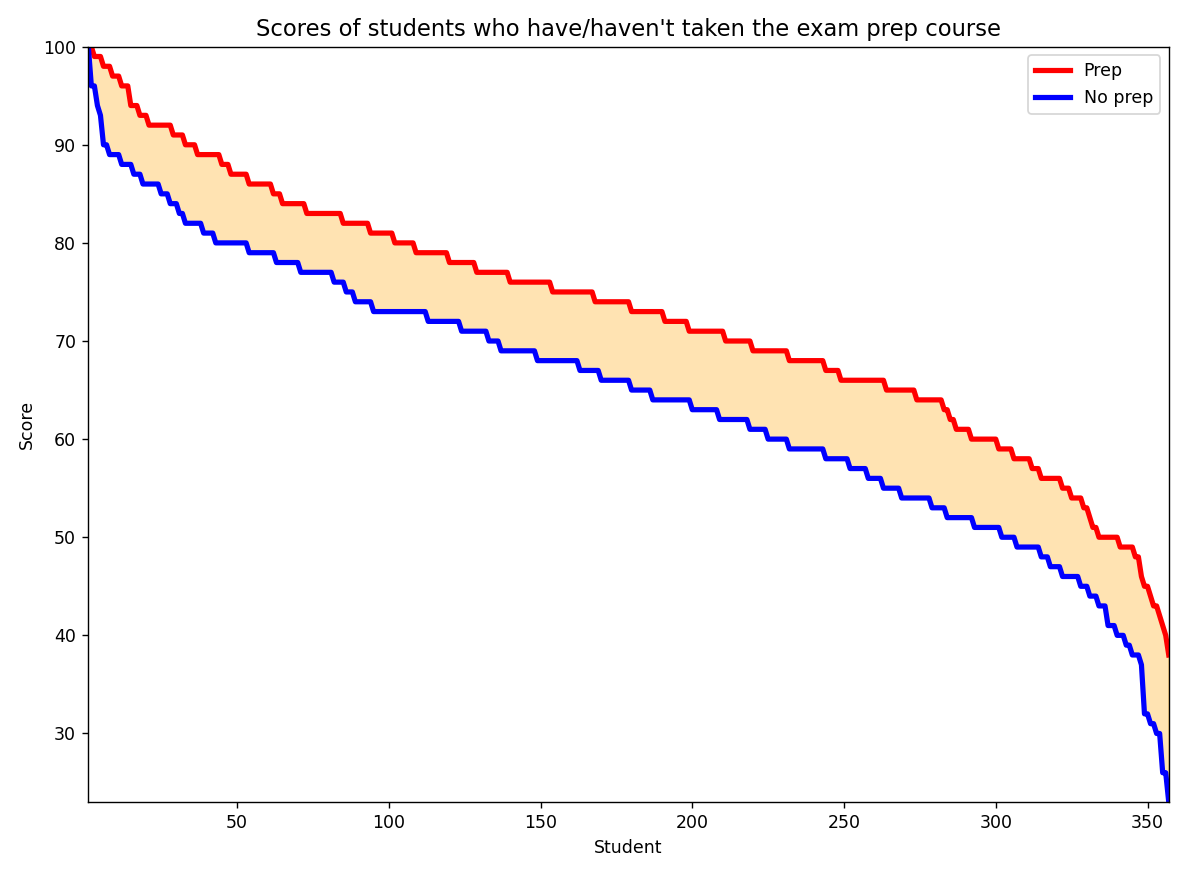

In [9]:
plt.figure(figsize=(9.5, 7))
plt.plot(average.index, average['Prep'], linewidth=3, color='red', label='Prep')
plt.plot(average.index, average['No Prep'], linewidth=3, color='blue', label='No prep')
plt.fill_between(average.index, average['No Prep'], average['Prep'], color='orange', alpha=0.3)
plt.gca().set(xlabel='Student', ylabel='Score')
plt.title(label="Scores of students who have/haven't taken the exam prep course", fontsize=13)
plt.margins(x=0, y=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

An easy trend to observe, students who took the preparation course for the test, generally scored higher in the exam than the students who did not take the exam preparation course.

### Returning the database back to normal

In [10]:
df['test preparation course'] = df['test preparation course'].replace({0: 'none', 1: 'completed'})
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

# Maybe this time we can see if the type of lunch affected the average test results

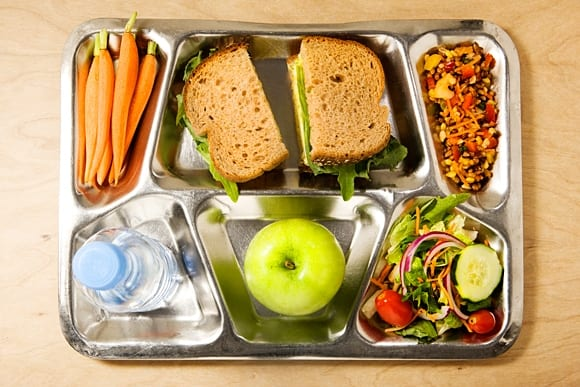

In [11]:
lunch = list(df['lunch'].unique()) # observing the unique types of values in this field
lunch

['standard', 'free/reduced']

Getting the scores of students in 2 sets, one of which had the standard lunch and the other having the free/reduced lunch option

In [12]:
lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score']]

standard = list(lunch.get_group('standard').values) # seperating the students from the type of lunch they had and getting their scores
reduced = list(lunch.get_group('free/reduced').values)
reduced[:10]

[array([47, 57, 44], dtype=int64),
 array([40, 43, 39], dtype=int64),
 array([64, 64, 67], dtype=int64),
 array([38, 60, 50], dtype=int64),
 array([18, 32, 28], dtype=int64),
 array([46, 42, 46], dtype=int64),
 array([54, 58, 61], dtype=int64),
 array([65, 75, 70], dtype=int64),
 array([74, 71, 80], dtype=int64),
 array([73, 74, 72], dtype=int64)]

Now to calculate the average scores of students in both sets and to store them.
The number of students in both sets are different, so to match them together, the sets will be made of equal size.
We take into account the number of students in the reduced lunch set and take that same amount of students from the standard lunch set.

In [13]:
# print(len(standard), len(reduced)) standard = 645, reduced = 355
r_size = 355

standard = random.choices(standard, k=r_size) # taking random n = size of reduced list, amount of elements from the standard set
len(reduced), len(standard)

(355, 355)

In [14]:
for x in range(len(reduced)):
    reduced[x] = np.round(np.mean(reduced[x])) # getting the rounded mean scores of students in each sets
    standard[x] = np.round(np.mean(standard[x]))

reduced.sort()
standard.sort()
lunch_average = list(zip(reduced, standard))
lunch_average[:10]

[(9.0, 39.0),
 (18.0, 42.0),
 (23.0, 43.0),
 (23.0, 43.0),
 (26.0, 44.0),
 (30.0, 44.0),
 (30.0, 44.0),
 (31.0, 45.0),
 (31.0, 45.0),
 (31.0, 45.0)]

##### Making a dataframe to properly display the scores of each set of students and to make a graph

In [15]:
lunch_df = pd.DataFrame(lunch_average, columns=['Reduced', 'Standard'], index=range(1, len(lunch_average) + 1))
lunch_df.head()

Reduced  Standard
1      9.0      39.0
2     18.0      42.0
3     23.0      43.0
4     23.0      43.0
5     26.0      44.0

##### Making the graph with the above dataset

<IPython.core.display.Javascript object>


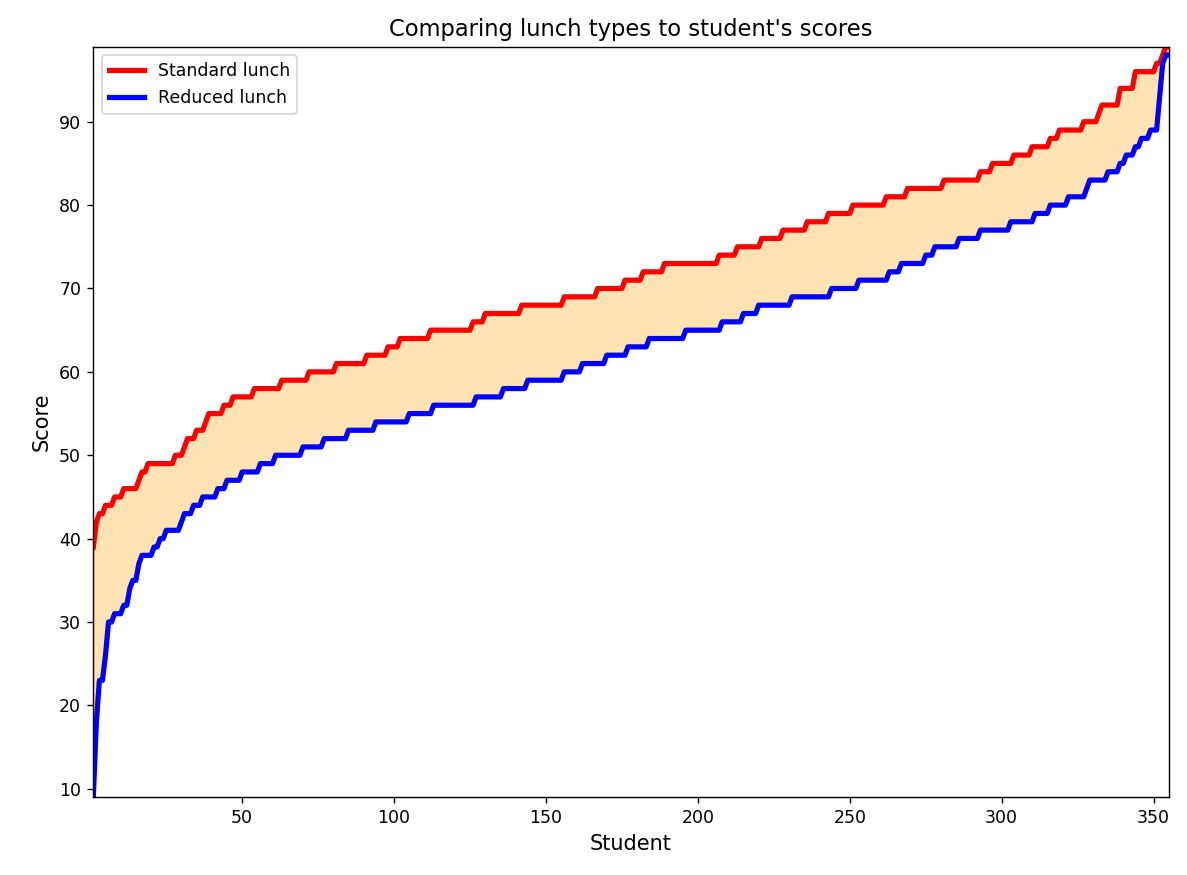

In [16]:
plt.figure(figsize=(9.5, 7))
plt.plot(lunch_df.index, lunch_df['Standard'], linewidth=3, c='red', label='Standard lunch')
plt.plot(lunch_df.index, lunch_df['Reduced'], linewidth=3, c='blue', label='Reduced lunch')
plt.fill_between(lunch_df.index, lunch_df['Reduced'], lunch_df['Standard'], color='orange', alpha=0.3)
plt.xlabel('Student', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Score', fontsize=12)
plt.yticks(fontsize=10)
plt.title(label="Comparing lunch types to student's scores", fontsize=13)
plt.tight_layout()
plt.margins(x=0, y=0)
plt.legend(fontsize=10, loc='best')
plt.show()

Oddly enough the shape of the graph is the same as the previous graph, simply reversed as I did not reverse sort (descending order) the list of scores. According to the graph the quality of lunch has a positively proportional relationship to that student's score.

# Now to see if there are any relationships between the student's parent's level of education and said student's score

In [17]:
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

Seperating the table into groups for each parental level of education

In [18]:
[df['parental level of education'].unique()]

[array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object)]

### Getting the average of scores for student in each subset of parental education

In [19]:
p_education = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']]

# taking rounded averages for each type of parental level of education
bachelor_degree = list(np.round(p_education.get_group("bachelor's degree").values.mean(axis=1)))
some_college = list(np.round(p_education.get_group('some college').values.mean(axis=1)))
master_degree = list(np.round(p_education.get_group("master's degree").values.mean(axis=1)))
associate_degree = list(np.round(p_education.get_group("associate's degree").values.mean(axis=1)))
high_school = list(np.round(p_education.get_group('high school').values.mean(axis=1)))
some_high_school = list(np.round(p_education.get_group('some high school').values.mean(axis=1)))

len(bachelor_degree), len(some_college), len(master_degree), len(associate_degree), len(high_school), len(some_high_school)

(118, 226, 59, 222, 196, 179)

First to sort all the average scores in each subset in descending order, then to size each subset according to the smallest size subset which is the size of the master's degree subset.

In [20]:
md_size = len(master_degree) # saving the aim size of the list

bachelor_degree.sort(reverse=True)
bachelor_degree = bachelor_degree[:md_size]

some_college.sort(reverse=True)
some_college = some_college[:md_size]

master_degree.sort(reverse=True)
master_degree = master_degree[:md_size]

associate_degree.sort(reverse=True)
associate_degree = associate_degree[:md_size]

high_school.sort(reverse=True)
high_school = high_school[:md_size]

some_high_school.sort(reverse=True)
some_high_school = some_high_school[:md_size]

len(bachelor_degree), len(some_college), len(master_degree), len(associate_degree), len(high_school), len(some_high_school)

(59, 59, 59, 59, 59, 59)

### Making a database to display all the scores for each parental education level 

In [21]:
parental_ed_df = pd.DataFrame(list(zip(bachelor_degree, some_college, master_degree, associate_degree, high_school, some_high_school)), 
                                        columns=['Bachelor Degree', 'Some College', "Master's Degree", 'Associate Degree', 'High School', 'Some High School'], 
                                         index=range(1, len(master_degree) + 1))

parental_ed_df.head()

Bachelor Degree  Some College  Master's Degree  Associate Degree  \
1            100.0          99.0             98.0             100.0   
2            100.0          99.0             97.0              98.0   
3            100.0          96.0             96.0              97.0   
4             99.0          94.0             94.0              96.0   
5             98.0          93.0             93.0              94.0   

   High School  Some High School  
1         96.0              99.0  
2         94.0              96.0  
3         89.0              91.0  
4         88.0              90.0  
5         87.0              89.0

### Making the graph with the above dataset

<IPython.core.display.Javascript object>


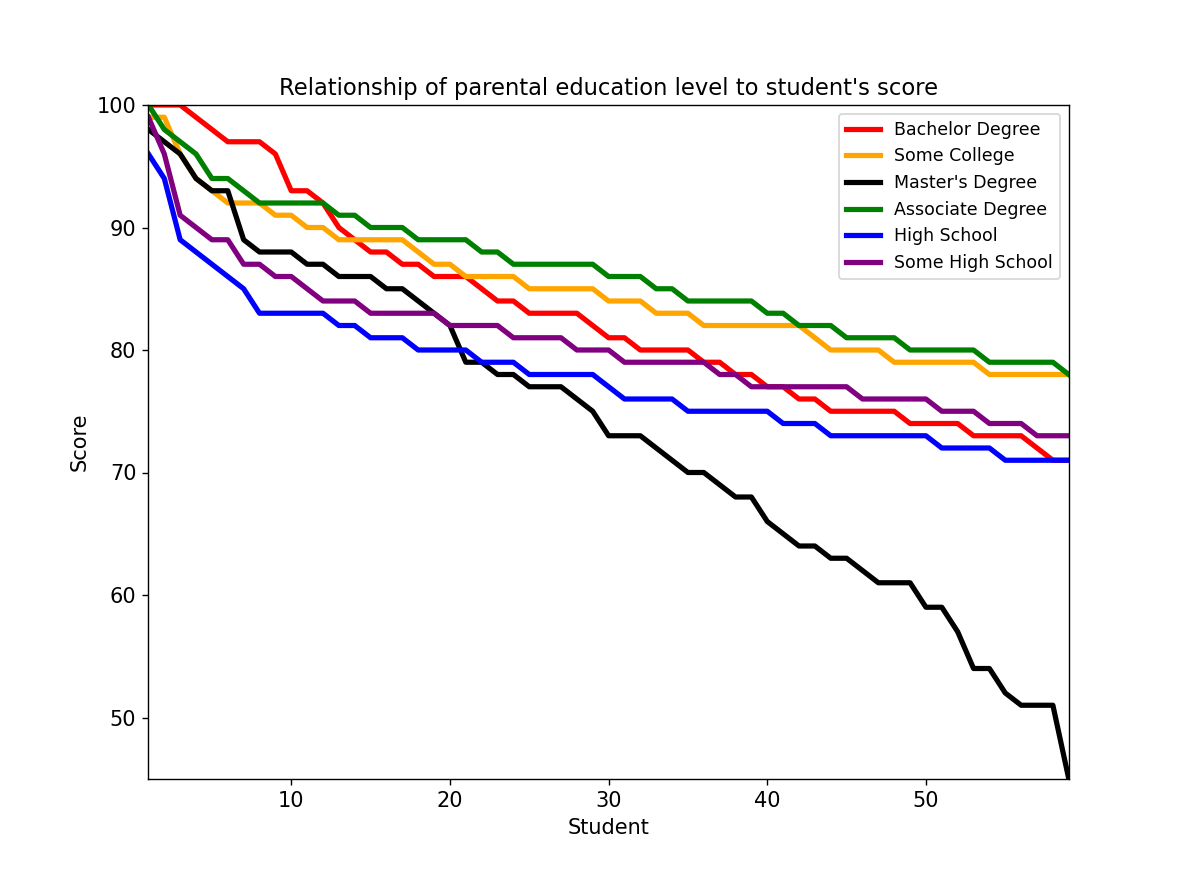

In [22]:
plt.figure(figsize=(9.5, 7))
plt.plot(parental_ed_df.index, parental_ed_df['Bachelor Degree'], linewidth=3, c='red', label='Bachelor Degree')
plt.plot(parental_ed_df.index, parental_ed_df['Some College'], linewidth=3, c='orange', label='Some College')
plt.plot(parental_ed_df.index, parental_ed_df["Master's Degree"], linewidth=3, c='black', label="Master's Degree")
plt.plot(parental_ed_df.index, parental_ed_df['Associate Degree'], linewidth=3, c='green', label='Associate Degree')
plt.plot(parental_ed_df.index, parental_ed_df['High School'], linewidth=3, c='blue', label='High School')
plt.plot(parental_ed_df.index, parental_ed_df['Some High School'], linewidth=3, c='purple', label='Some High School')
plt.title("Relationship of parental education level to student's score", fontsize=13)
plt.xlabel('Student', size=12)
plt.xticks(size=12)
plt.ylabel('Score', size=12)
plt.yticks(size=12)
plt.margins(x=0, y=0)
plt.legend(fontsize=10, loc='best')
plt.show()

The relationships between the parental educational level and their child's score on the test is relatively similar to other parental education levels, however there is a noticeble dip where the parental eduation level was that of a Master's Degree, their child's score on the test eventually dips at a sharper rate than other parental education levels and their child's score. Note: The subset has taken the 59 (which was the size of the Master's Degree subset) highest scoring students in each parental education category.

### Making sure the original database is alright for further analysis

In [23]:
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

# Trying to find a relationship between the student's average score and their race/ethnicity 

Finding the unique values in the race/ethnicity column

In [24]:
list(df['race/ethnicity'].unique())

['group B', 'group C', 'group A', 'group D', 'group E']

### Extracting the mean scores for each subset and making a dataframe to display them

In [25]:
race = df.groupby('race/ethnicity')

# getting the rounded mean values for each subset of race/ethnicity
groupA = list(np.round(race.get_group('group A').mean(axis=1)))
groupB = list(np.round(race.get_group('group B').mean(axis=1)))
groupC = list(np.round(race.get_group('group C').mean(axis=1)))
groupD = list(np.round(race.get_group('group D').mean(axis=1)))
groupE = list(np.round(race.get_group('group E').mean(axis=1)))

# sorting out each set of average scores in ascending order
for x in [groupA, groupB, groupC, groupD, groupE]:
    x.sort()

race_df = pd.DataFrame(list(zip(groupA, groupB, groupC, groupD, groupE)), columns=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'], 
                                      index=range(1, len(groupA) + 1))
race_df.head()

Group A  Group B  Group C  Group D  Group E
1     23.0     18.0      9.0     31.0     26.0
2     37.0     23.0     29.0     32.0     35.0
3     39.0     26.0     30.0     38.0     40.0
4     41.0     30.0     31.0     39.0     42.0
5     41.0     30.0     32.0     39.0     43.0

### Making the graph with the above dataset

<IPython.core.display.Javascript object>


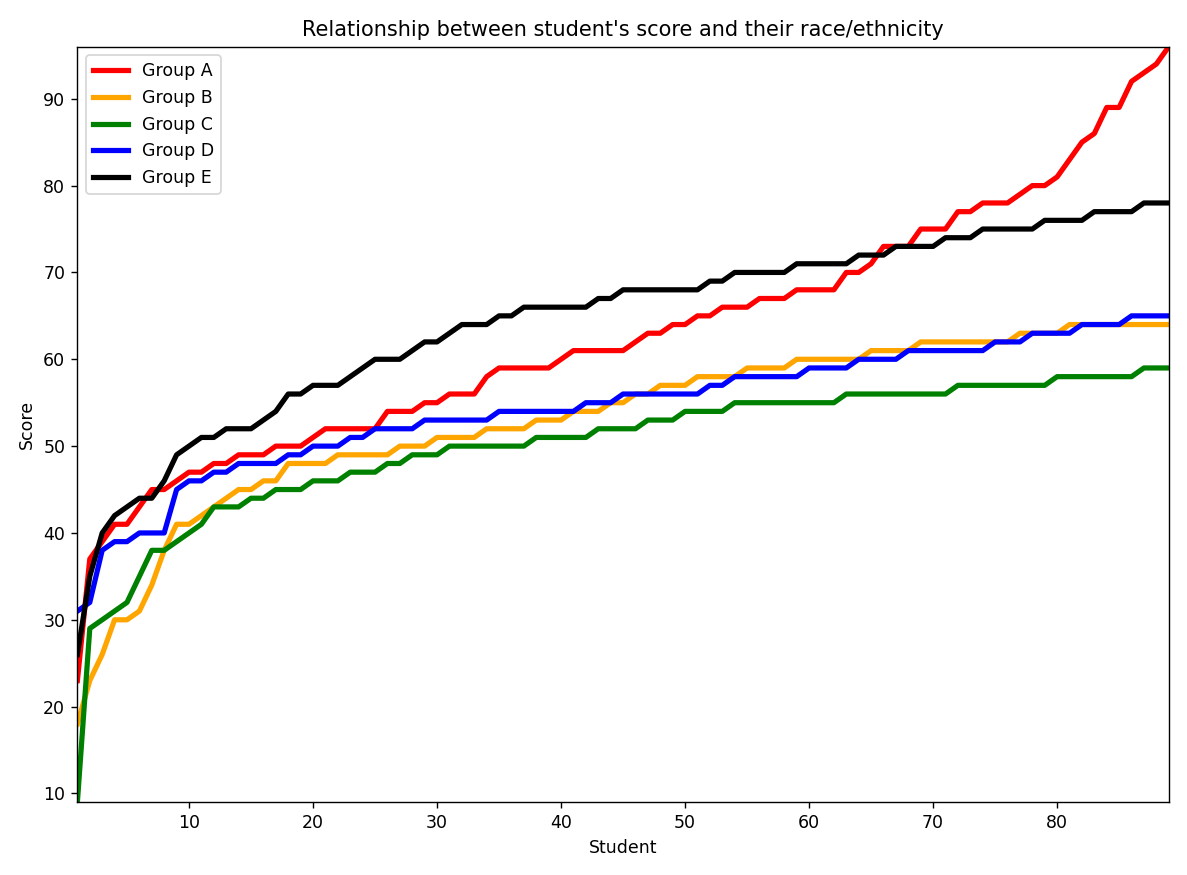

In [26]:
plt.figure(figsize=(9.5, 7))
plt.plot(race_df.index, race_df['Group A'], linewidth=3, c='red', label='Group A')
plt.plot(race_df.index, race_df['Group B'], linewidth=3, c='orange', label='Group B')
plt.plot(race_df.index, race_df['Group C'], linewidth=3, c='green', label='Group C')
plt.plot(race_df.index, race_df['Group D'], linewidth=3, c='blue', label='Group D')
plt.plot(race_df.index, race_df['Group E'], linewidth=3, c='black', label='Group E')
plt.xlabel('Student')
plt.ylabel('Score')
plt.title(label="Relationship between student's score and their race/ethnicity")
plt.margins(x=0, y=0)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Luckily there is no special relationship between the student's scores and their race/ethnicity. Although near the end, the disparity between the highest scores of group A and the other groups, especially group C, is noticable.

# Last but not least, let's check the student's scores and their gender 

In [27]:
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

### Checking the size of the dataset when it is split based on gender

In [28]:
len(df[df['gender'] == 'male']), len(df[df['gender'] == 'female'])

(482, 518)

### Extracting the mean scores for each gender and displaying the results in a dataset

In [29]:
gender = df.groupby('gender')

male = list(np.round(gender.get_group('male').mean(axis=1)))
male.sort()

female = list(np.round(gender.get_group('female').mean(axis=1)))
female.sort()

gender_df = pd.DataFrame(list(zip(male, female)), columns=['Male', 'Female'])
gender_df.head()

Male  Female
0  23.0     9.0
1  23.0    18.0
2  26.0    26.0
3  30.0    29.0
4  31.0    30.0

### Making the graph based on the above dataset 

<IPython.core.display.Javascript object>


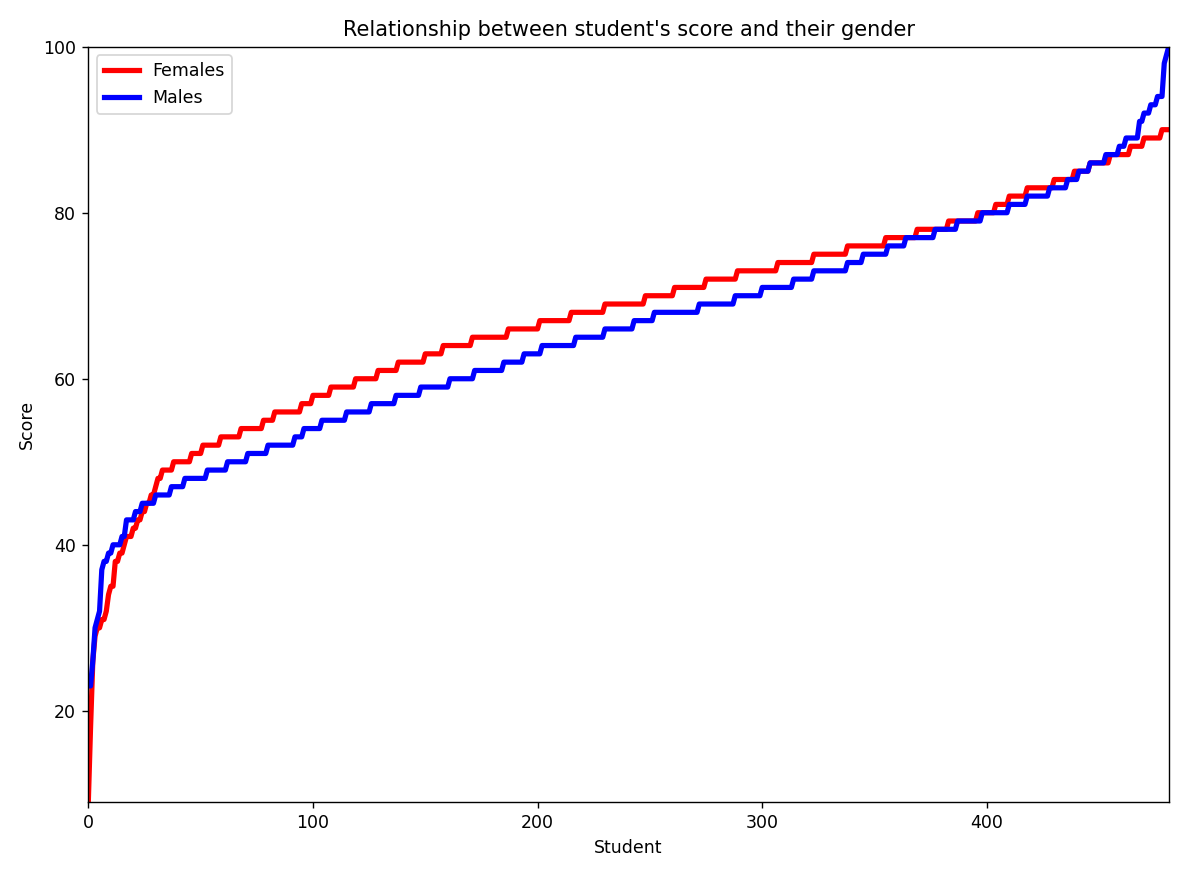

In [30]:
plt.figure(figsize=(9.5, 7))
plt.plot(gender_df.index, gender_df['Female'], linewidth=3, c='red', label='Females')
plt.plot(gender_df.index, gender_df['Male'], linewidth=3, c='blue', label='Males')
plt.gca().set(xlabel='Student', ylabel='Score')
plt.title(label="Relationship between student's score and their gender")
plt.margins(x=0, y=0)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Again, no discernible relationship between the student's scores and their gender.

# Now to plot the individual subject scores of the top 50 highest average scoring students 

In [31]:
df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

### Making a new column with all the student's average scores over the 3 subject's scores

In [32]:
average_df = df.copy() # making a seperate copy of the original dataset

average_df['Average'] = np.round(average_df[['math score', 'reading score', 'writing score']].mean(axis=1))
average_df = average_df.sort_values(by='Average', ascending=False) # sorting the table in descending order based on average score
average_df = average_df.sample(50) # taking 50 random students and using their exam results to observe any relationships
average_df.index = range(0, len(average_df))
average_df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group D             master's degree      standard   
1    male        group A          associate's degree      standard   
2    male        group D           bachelor's degree  free/reduced   
3    male        group C                some college      standard   
4    male        group D                some college      standard   

  test preparation course  math score  reading score  writing score  Average  
0                    none          74             79             82     78.0  
1                    none          54             53             47     51.0  
2               completed          74             79             75     76.0  
3                    none          53             39             37     43.0  
4                    none          40             42             38     40.0

### Making the graph with the above database

<IPython.core.display.Javascript object>


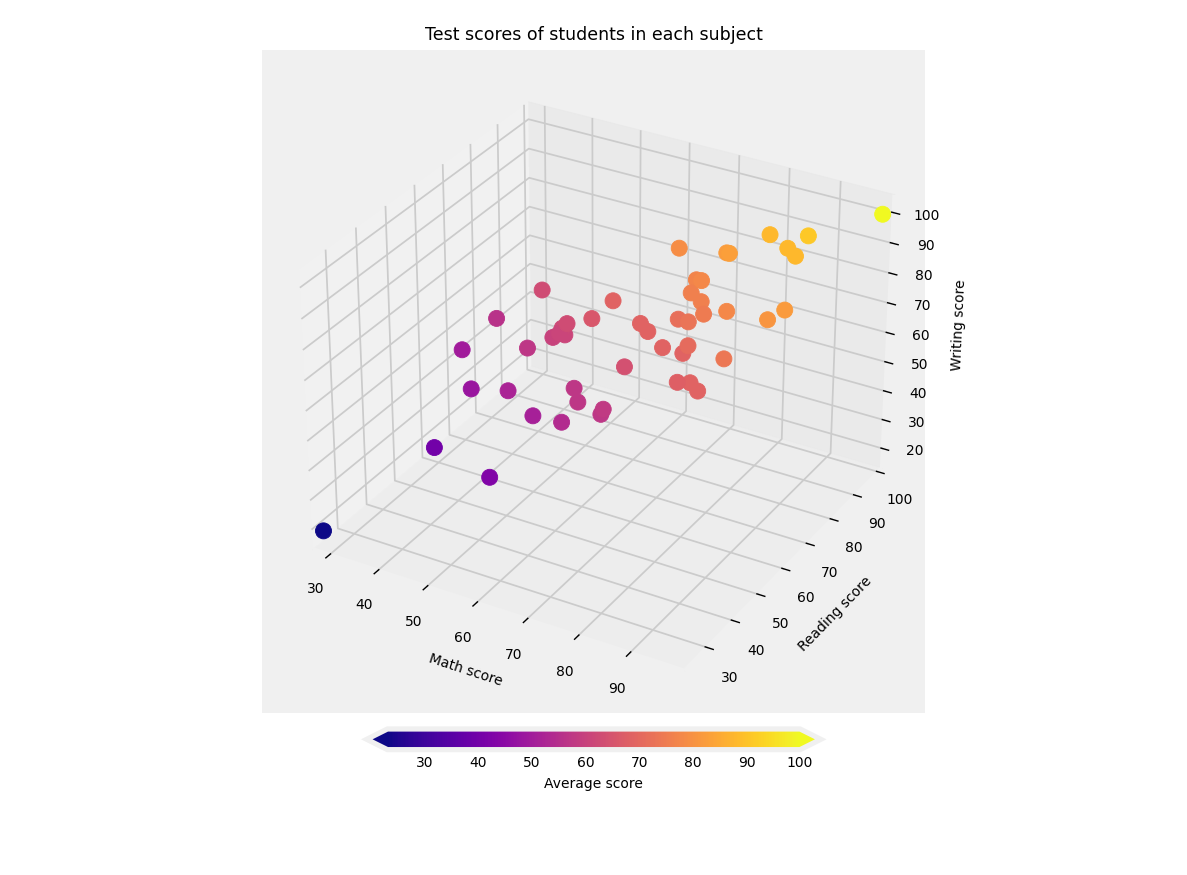

In [33]:
plt.figure(figsize=(9.5, 7))
plt.style.use('fivethirtyeight')
ax = plt.axes(projection='3d')
ax1 = ax.scatter(average_df['math score'], average_df['reading score'], average_df['writing score'], 
                   s=85, c=average_df['Average'], cmap='plasma', alpha=1)
plt.xlim([average_df['math score'].min(), average_df['math score'].max()])
plt.ylim([average_df['reading score'].min(), average_df['reading score'].max()])
plt.title("Test scores of students in each subject", fontsize=10)
plt.xlabel('Math score', size=8)
plt.ylabel('Reading score', size=8)
ax.set_zlabel('Writing score', size=8)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
cbar = plt.colorbar(ax1, shrink=0.4, orientation='horizontal', extend='both', pad=0.02)
cbar.set_label('Average score', size=8)
cbar.ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

Nothing special to derive from the graph, the scores for each subject seem to all have a proportional relationship to one another.

# Making a K Nearest Neighbors model to predict if the student took the exam preparation course 

In [34]:
ml_df = df.copy()
ml_df.head()

gender race/ethnicity parental level of education         lunch  \
Student                                                                    
1        female        group B           bachelor's degree      standard   
2        female        group C                some college      standard   
3        female        group B             master's degree      standard   
4          male        group A          associate's degree  free/reduced   
5          male        group C                some college      standard   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

### Converting each string value in columns to an integer

In [35]:
ml_df = ml_df.replace({'female': 0, 'male': 1, 'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5, 'standard': 1, 'free/reduced': 0})
ml_df = ml_df.replace({"bachelor's degree": 0, 'some college': 1, "master's degree": 2,
                       "associate's degree": 3, 'high school': 4, 'some high school': 5})
# ml_df = ml_df.replace({'none': 0, 'completed': 1})
ml_df.head()

gender  race/ethnicity  parental level of education  lunch  \
Student                                                               
1             0               2                            0      1   
2             0               3                            1      1   
3             0               2                            2      1   
4             1               1                            3      0   
5             1               3                            1      1   

        test preparation course  math score  reading score  writing score  
Student                                                                    
1                          none          72             72             74  
2                     completed          69             90             88  
3                          none          90             95             93  
4                          none          47             57             44  
5                          none          76             78             75

In [36]:
y = list(ml_df['test preparation course'].values) # target value
X = list(ml_df[['gender', 'race/ethnicity','parental level of education','lunch', 'math score', 'reading score', 'writing score']].values) # feature values
X[:10]

[array([ 0,  2,  0,  1, 72, 72, 74], dtype=int64),
 array([ 0,  3,  1,  1, 69, 90, 88], dtype=int64),
 array([ 0,  2,  2,  1, 90, 95, 93], dtype=int64),
 array([ 1,  1,  3,  0, 47, 57, 44], dtype=int64),
 array([ 1,  3,  1,  1, 76, 78, 75], dtype=int64),
 array([ 0,  2,  3,  1, 71, 83, 78], dtype=int64),
 array([ 0,  2,  1,  1, 88, 95, 92], dtype=int64),
 array([ 1,  2,  1,  0, 40, 43, 39], dtype=int64),
 array([ 1,  4,  4,  0, 64, 64, 67], dtype=int64),
 array([ 0,  2,  4,  0, 38, 60, 50], dtype=int64)]

### Splitting the dataset into a training set and a test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # splitting the dataset into a training set and a test set

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Getting the scores for predicting the train labels and the test labels 

In [38]:
train_score = []
test_score = []
k_values = range(1, 51)
for x in k_values:
    clf = KNeighborsClassifier(n_neighbors=x)
    clf.fit(X_train, y_train)
    train_score.append(np.round((clf.score(X_train, y_train) * 100), 1))
    test_score.append(np.round((clf.score(X_test, y_test) * 100), 1))

test_score[:5], np.max(test_score)

([64.0, 57.0, 66.0, 62.5, 66.0], 71.5)

### Making a dataset to properly display the values

In [39]:
accuracy_df = pd.DataFrame(list(zip(k_values, train_score, test_score)), columns=['K Value', 'Train Score', 'Test Score']).set_index('K Value')
accuracy_df.head()

Train Score  Test Score
K Value                         
1              100.0        64.0
2               82.1        57.0
3               82.4        66.0
4               76.4        62.5
5               75.4        66.0

### Plotting a graph for the test scores with the N values for the K Neighbors Classifeir

<IPython.core.display.Javascript object>


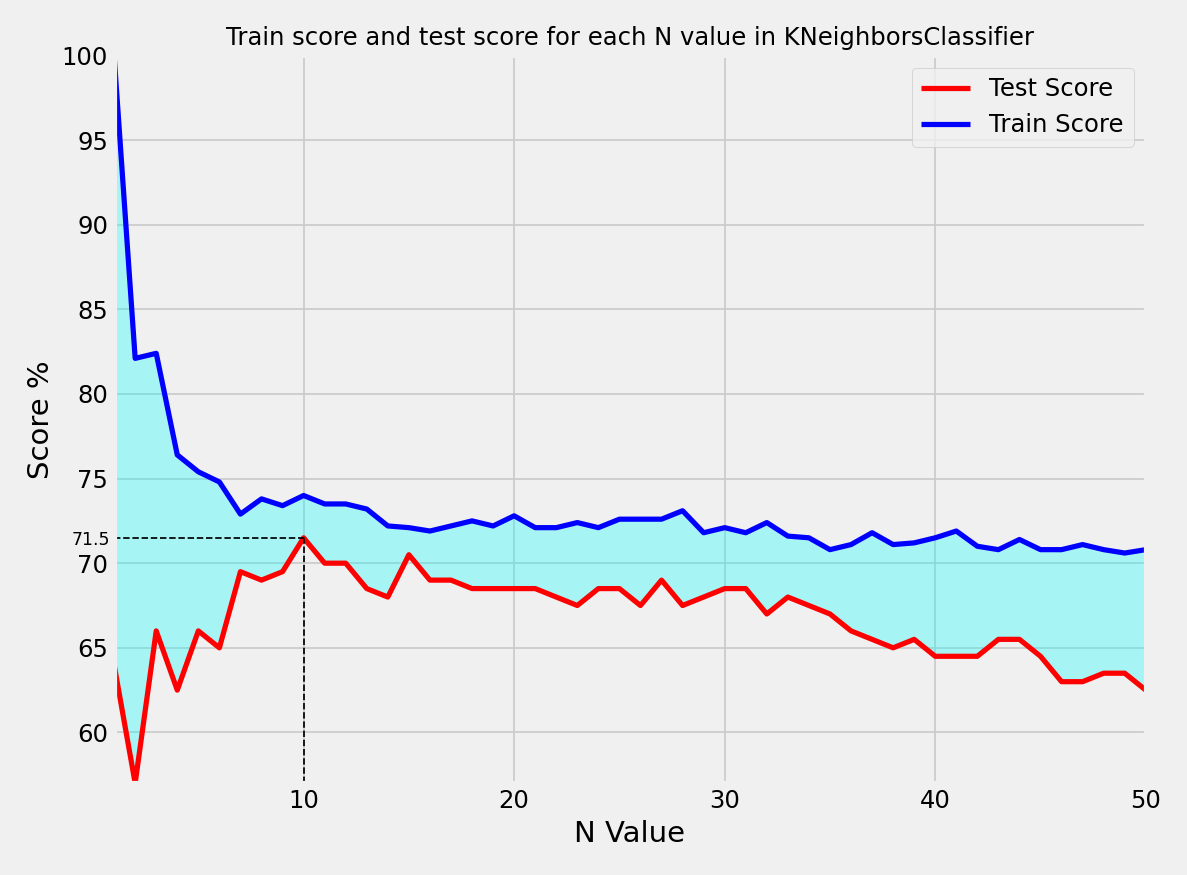

<IPython.core.display.Javascript object>


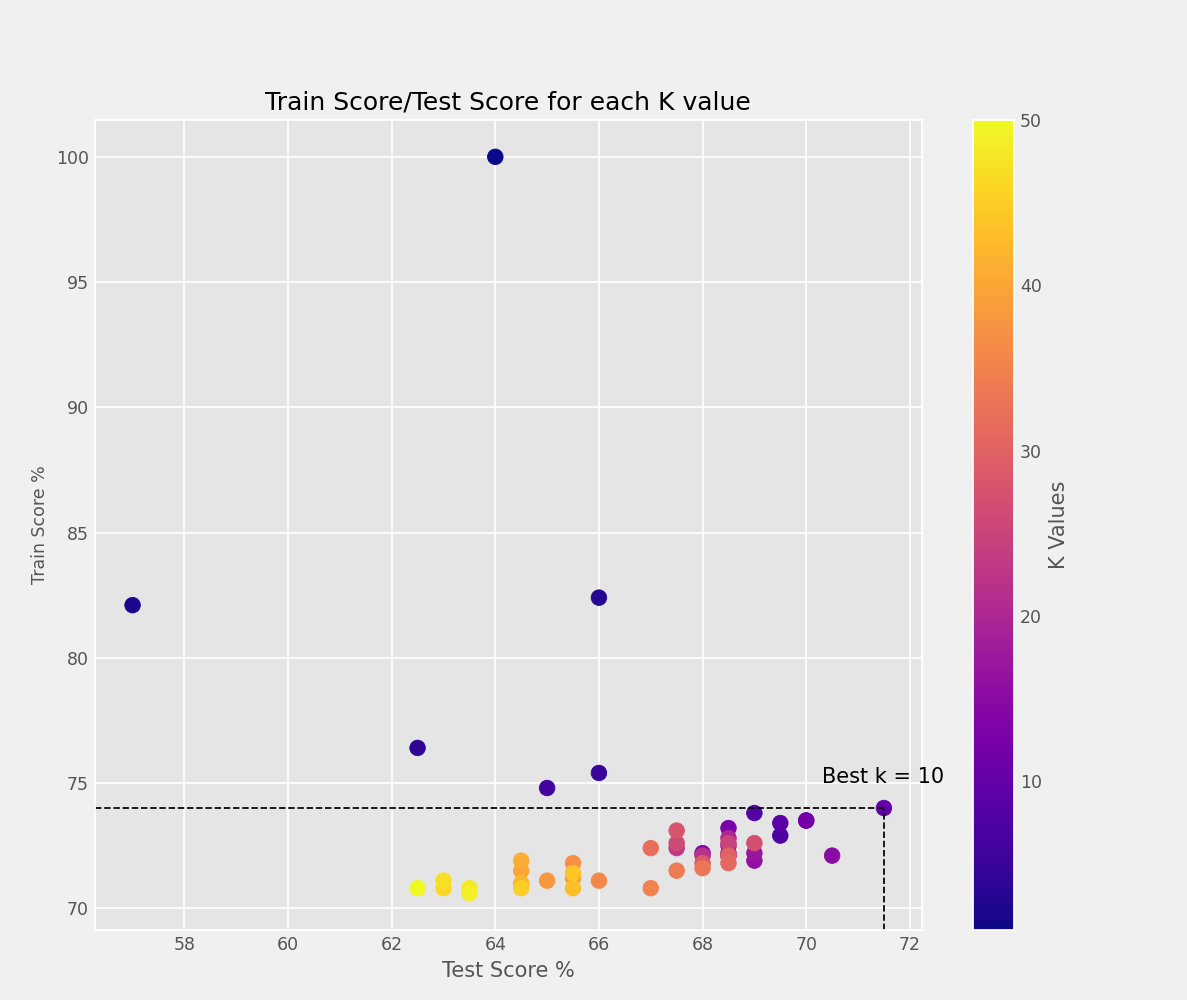

In [40]:
best_k = accuracy_df.groupby('Test Score').get_group(np.max(accuracy_df['Test Score'])) # saving best test score set

plt.style.use('fivethirtyeight')
plt.figure(figsize=(9.5, 7))
plt.plot(accuracy_df.index, accuracy_df['Test Score'], linewidth=3, color='red', label='Test Score')
plt.plot(accuracy_df.index, accuracy_df['Train Score'], linewidth=3, color='blue', label='Train Score')
plt.axhline(y=np.max(accuracy_df['Test Score']), xmax=0.186, linewidth=1, linestyle='--', color='black')
plt.axvline(x=best_k.index, ymax=0.335, linewidth=1, linestyle='--', color='black')
plt.text(-1, np.max(accuracy_df['Test Score'])-0.45, s=np.max(test_score), size=10)
plt.fill_between(k_values, test_score, train_score, color='cyan', alpha=0.3)
plt.title('Train score and test score for each N value in KNeighborsClassifier', size=14)
plt.xlabel('N Value')
plt.ylabel('Score %')
plt.legend(loc='best')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9.5, 8))
plt.style.use('ggplot')
ax = plt.scatter(accuracy_df['Test Score'], accuracy_df['Train Score'], s=80, c=accuracy_df.index, alpha=1, cmap='plasma')
cbar = plt.colorbar(ax)
cbar.set_label('K Values')
plt.xlabel('Test Score %', size=12)
plt.ylabel('Train Score %', size=10)
plt.title('Train Score/Test Score for each K value')
plt.axhline(float(best_k['Train Score']), xmax=0.955, linewidth=1, linestyle='--', c='black')
plt.axvline(float(best_k['Test Score']), ymax=0.15, linewidth=1, linestyle='--', c='black')
plt.text(x=best_k['Test Score'] - 1.2, y=best_k['Train Score'] + 1, s='Best k = {}'.format(best_k.index[0]), size=12)
plt.show()

The columns gender, race/ethnicity, parental level of education, lunch, math score, reading score, and writing score were used as the target features to predict the target value which was whether or not the respective students took the exam preparation course or not. The highest test score value that could be achieved from my model is 71.5% with a k value of 10.

### Making the model with the optimal k value

In [41]:
K_clf = KNeighborsClassifier(n_neighbors=10)
K_clf.fit(X_train, y_train)

print('The training set score: {}'.format(K_clf.score(X_train, y_train)))
print('The test set score: {}'.format(K_clf.score(X_test, y_test)))
print('With a K value of:', 10)

The training set score: 0.74
The test set score: 0.715
With a K value of: 10


# Now to make another model using logistic regression

### Checking to see if the tables we are going to use are suitable to be used again

In [42]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Going to use the same sets of tables that have already been split up beforehand

### Getting the scores for training set and the test set using Logistic Regression

In [43]:
train_score = []
test_score = []
C_values = range(1, 51)

for C in C_values:
    clf = LogisticRegression(max_iter=10000, C=C)
    clf.fit(X_train, y_train)
    train_score.append(np.round((clf.score(X_train, y_train) * 100), 1))
    test_score.append(np.round((clf.score(X_test, y_test) * 100), 1))
    
test_score[:10], np.max(test_score)

([68.0, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5], 68.0)

### Making a dataset with the above values for better viewing 

In [44]:
LR_df = pd.DataFrame(list(zip(C_values, train_score, test_score)), columns=['C', 'Train Score', 'Test Score']).set_index('C')
LR_df.head()

Train Score  Test Score
C                         
1         74.0        68.0
2         74.1        67.5
3         74.1        67.5
4         74.1        67.5
5         74.1        67.5

### Finding the highest test score for the above dataset 

In [45]:
best_C = LR_df.groupby('Test Score').get_group(np.max(LR_df['Test Score']))
best_C

Train Score  Test Score
C                         
1         74.0        68.0

### Making a graph to display the Test and Train scores depending on the C parameter of Logistic Regression 

<IPython.core.display.Javascript object>


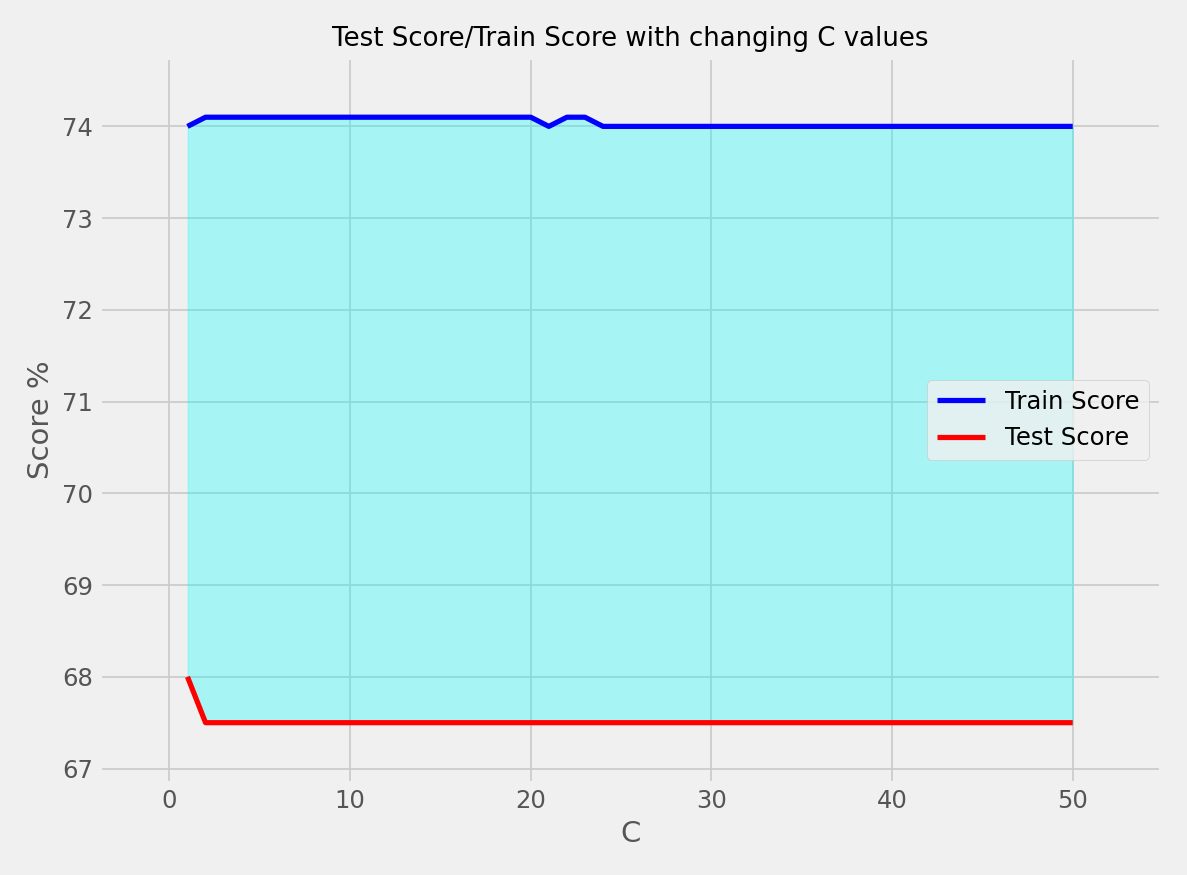

<IPython.core.display.Javascript object>


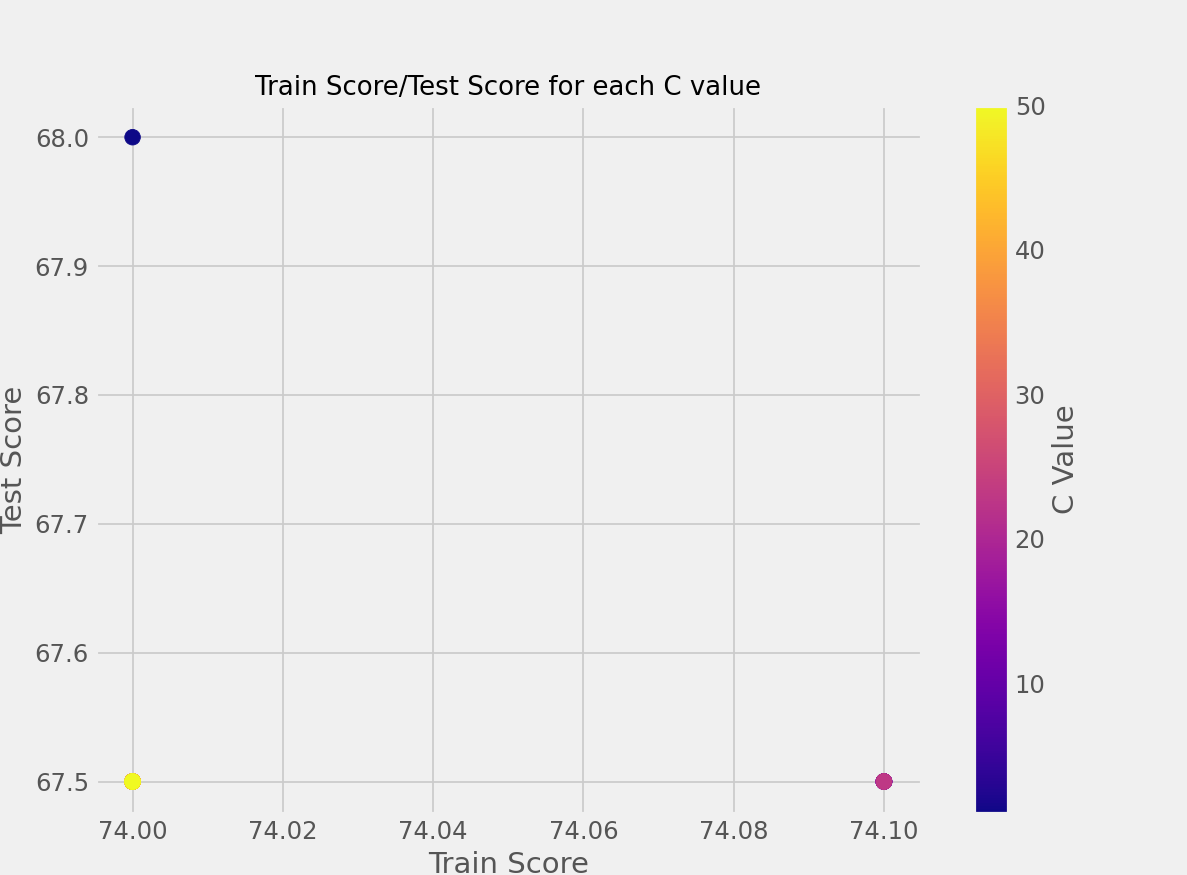

In [49]:
plt.figure(figsize=(9.5,7))
plt.plot(LR_df.index, LR_df['Train Score'], linewidth=3, c='blue', label='Train Score')
plt.plot(LR_df.index, LR_df['Test Score'], linewidth=3, c='red', label='Test Score')
plt.fill_between(LR_df.index, LR_df['Test Score'], LR_df['Train Score'], color='cyan', alpha=0.3)
plt.title('Test Score/Train Score with changing C values', size=15)
plt.xlabel('C')
plt.ylabel('Score %')
plt.legend(loc='best')
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9.5,7))
plt.style.use('fivethirtyeight')
ax = plt.scatter(LR_df['Train Score'], LR_df['Test Score'], s=80, c=LR_df.index, cmap='plasma', alpha=1)
plt.title('Train Score/Test Score for each C value', size=15)
plt.xlabel('Train Score')
plt.ylabel('Test Score')
cbar = plt.colorbar(ax)
cbar.set_label('C Value')
plt.show()

From the previous set of graphs we can determine that changing the C parameter for Logistic Regression has little to no effect on the training and test scores

### Making the model with optimal C value: 1 

In [47]:
LR_clf = LogisticRegression(max_iter=10000, C=1)
LR_clf.fit(X_train, y_train)

print('The Training set score: {}'.format(LR_clf.score(X_train, y_train)))
print('The Test set score: {}'.format(LR_clf.score(X_test, y_test)))
print('With a C value of:', 1)

The Training set score: 0.74
The Test set score: 0.68
With a C value of: 1


Overall, the KNeighborsClassifier provided better test scores and is overall, a better algorithm to choose for making a model based on this dataset